In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/Users/khali/Desktop/Coding Workspace/DataMining/data/cleaned/cleaned_data.csv')
data.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 57.7+ MB


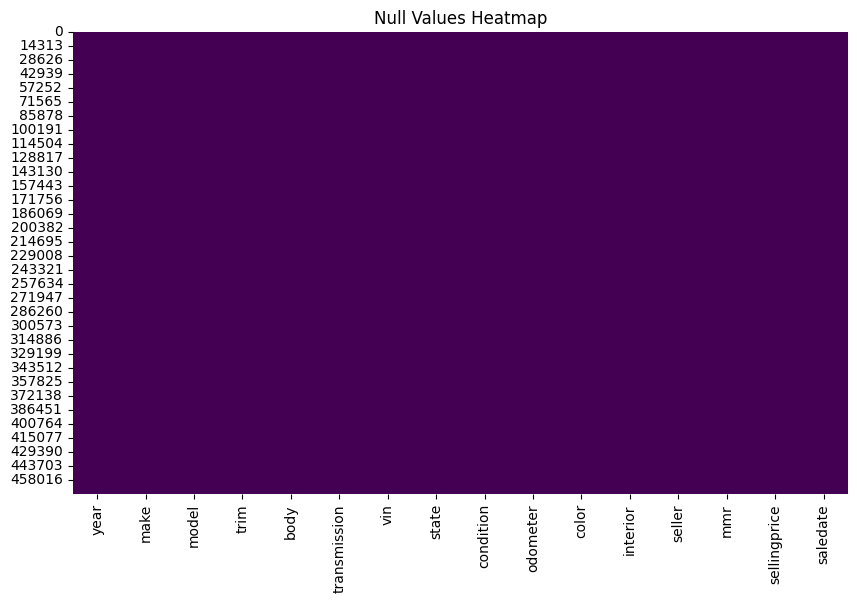

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()


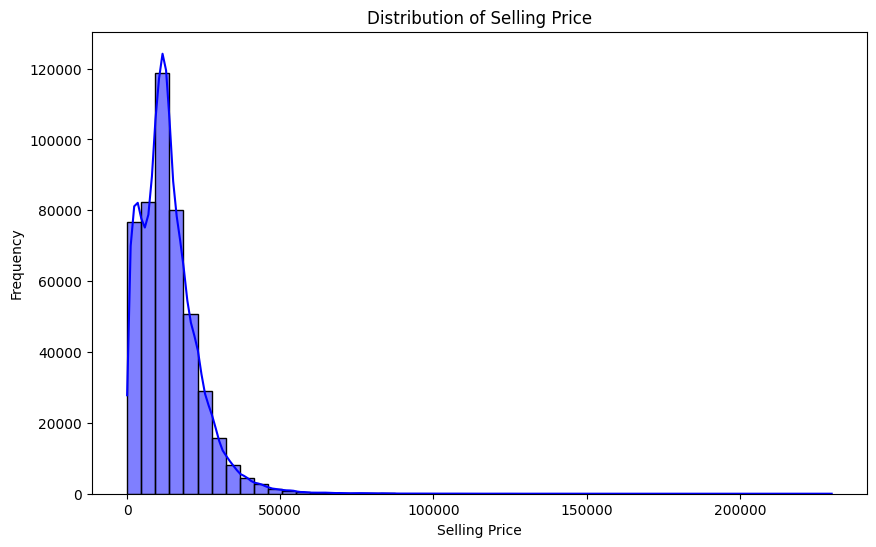

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sellingprice'], bins=50, kde=True, color='blue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


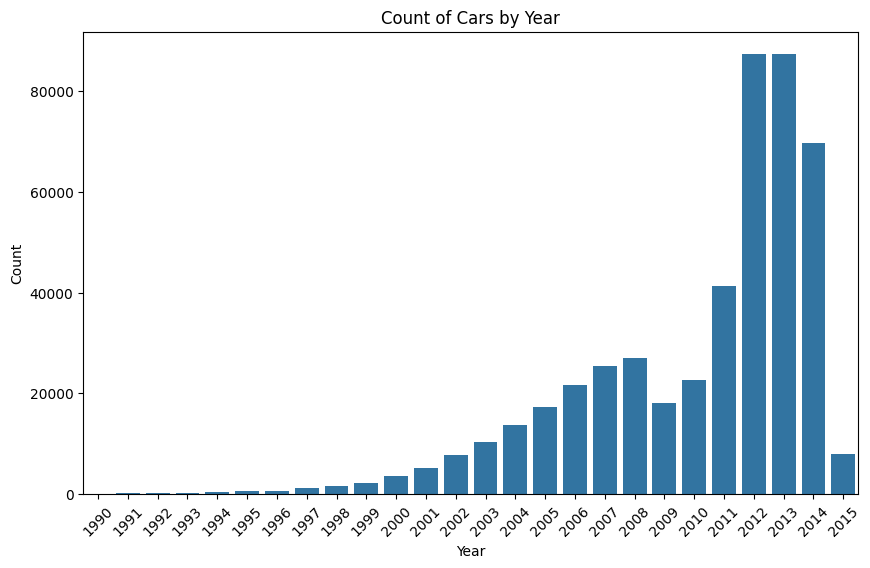

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='year', order=sorted(data['year'].unique()))
plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


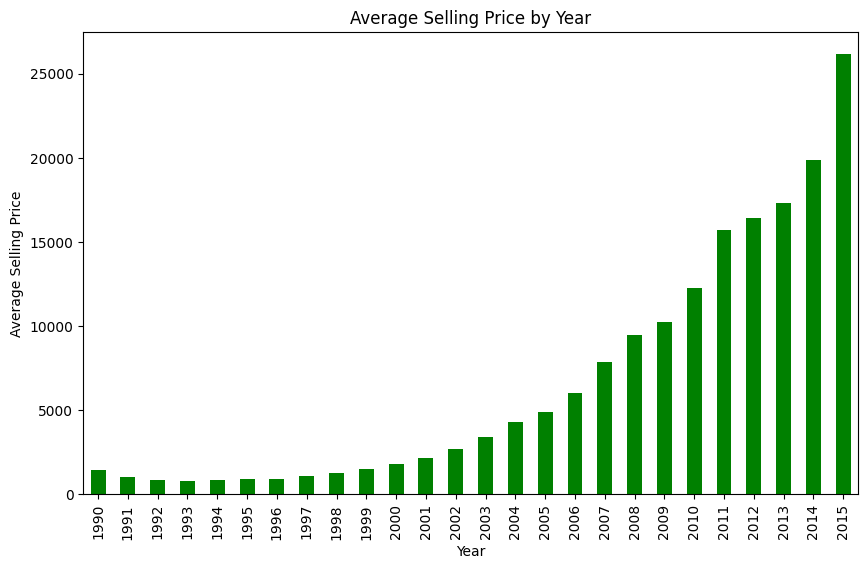

In [7]:
avg_price_by_year = data.groupby('year')['sellingprice'].mean()
avg_price_by_year.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.show()


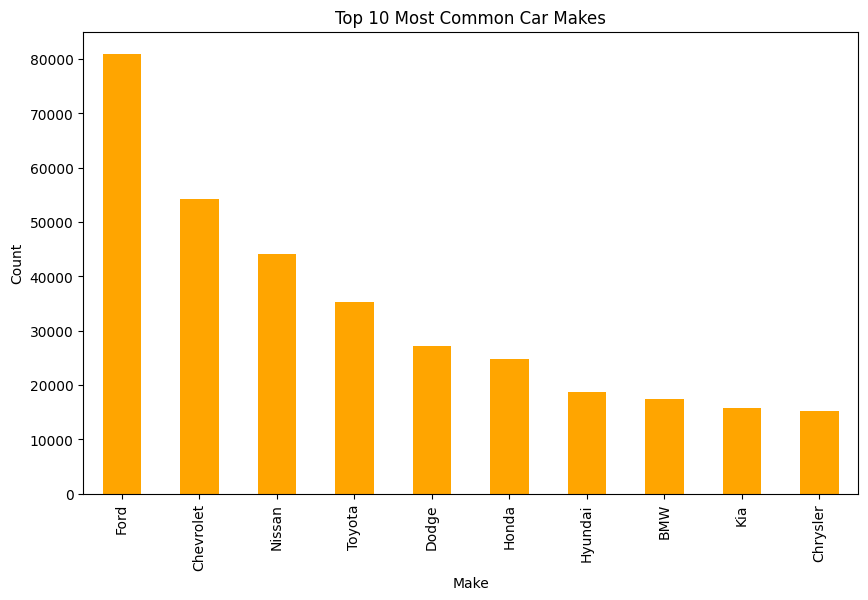

In [8]:
top_makes = data['make'].value_counts().head(10)
top_makes.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Most Common Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()


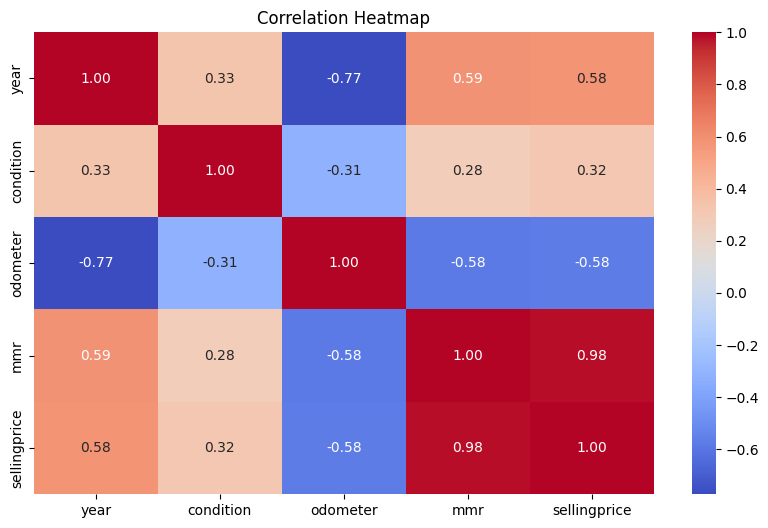

In [23]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()



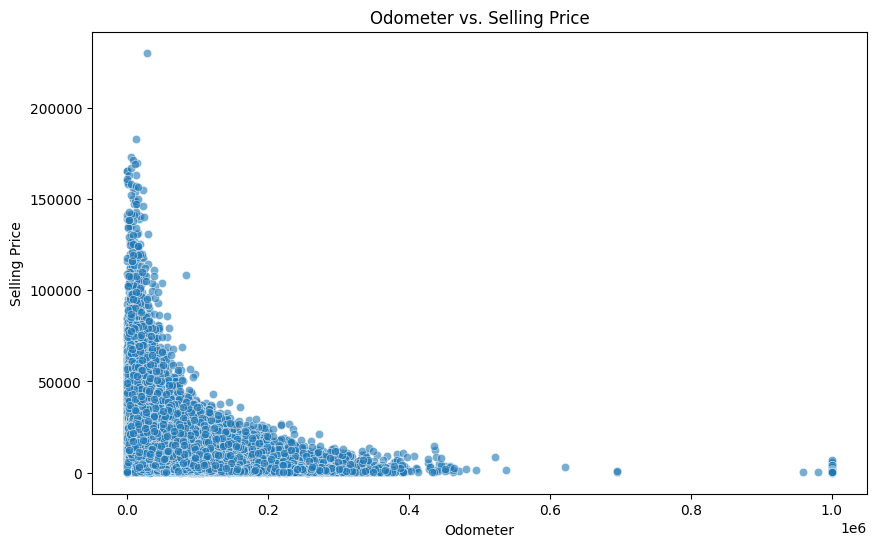

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='odometer', y='sellingprice', alpha=0.6)
plt.title('Odometer vs. Selling Price')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()


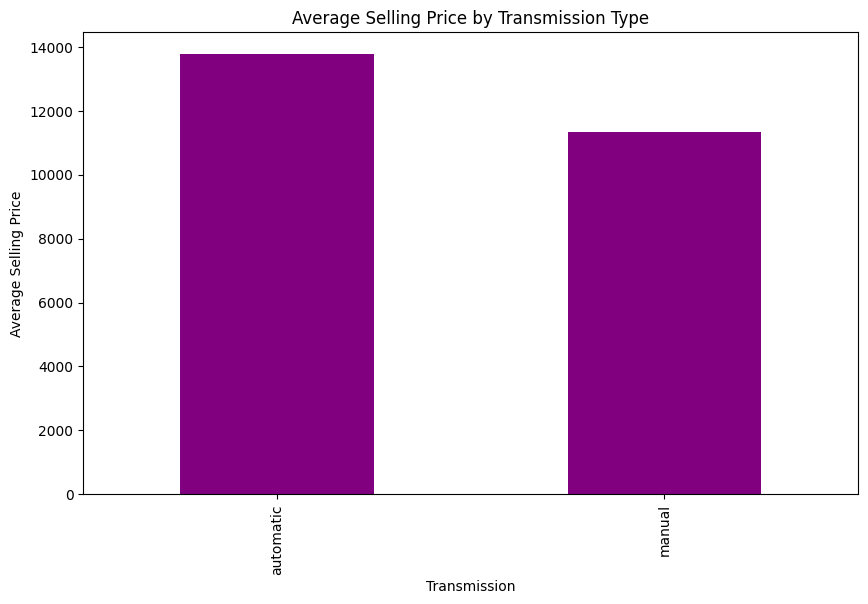

In [11]:
avg_price_by_trans = data.groupby('transmission')['sellingprice'].mean()
avg_price_by_trans.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price')
plt.show()


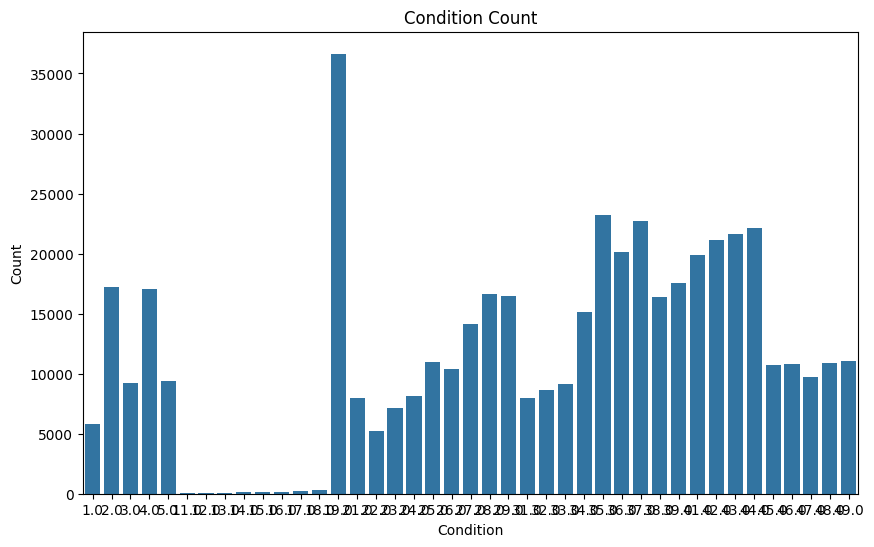

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='condition', order=sorted(data['condition'].unique()))
plt.title('Condition Count')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


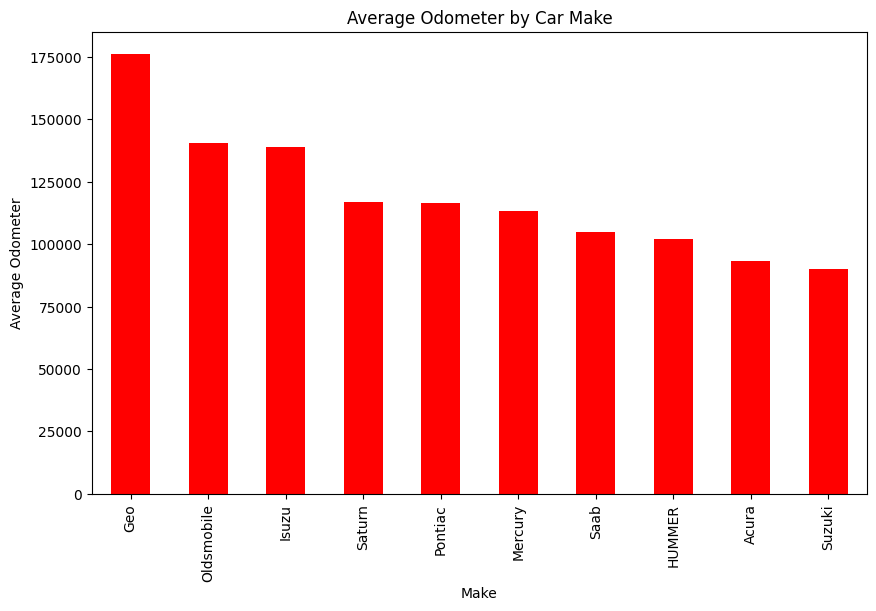

In [13]:
avg_odometer_by_make = data.groupby('make')['odometer'].mean().sort_values(ascending=False).head(10)
avg_odometer_by_make.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Average Odometer by Car Make')
plt.xlabel('Make')
plt.ylabel('Average Odometer')
plt.show()


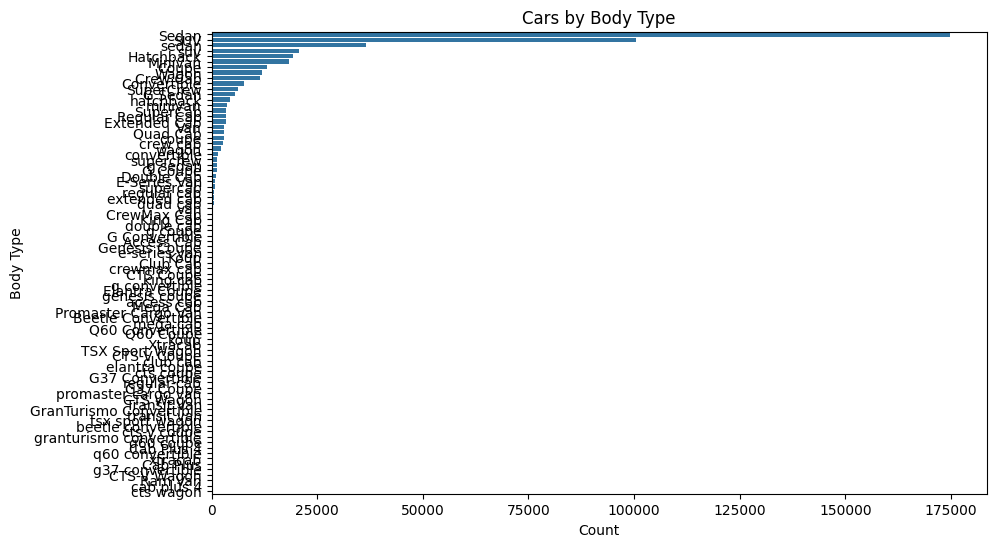

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='body', order=data['body'].value_counts().index)
plt.title('Cars by Body Type')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.show()


Rows with invalid saledate values:
        year           make          model         trim       body  \
18      2015      Chevrolet         Impala          LTZ      Sedan   
1387    2012            Kia         Optima           SX      Sedan   
2053    2014          Dodge  Grand Caravan          SXT    Minivan   
2475    2010  Mercedes-Benz        E-Class         E350      Sedan   
2688    2009          Honda          Civic           LX      Sedan   
...      ...            ...            ...          ...        ...   
472320  2011            BMW       5 Series         528i      Sedan   
472321  2012            Ram           2500  Power Wagon   Crew Cab   
472322  2012            BMW             X5    xDrive35d        SUV   
472323  2015         Nissan         Altima        2.5 S      sedan   
472324  2014           Ford          F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
18        automatic  2g1165s30f9103921    ca   

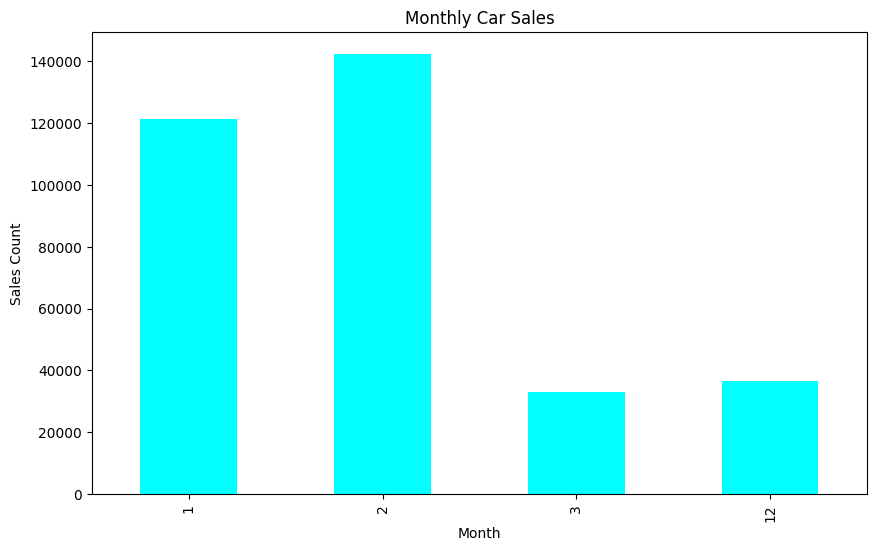

In [24]:
# Convert 'saledate' to datetime, with errors='coerce' to handle invalid dates
data['saledate'] = pd.to_datetime(data['saledate'], errors='coerce')

# Check for any rows where 'saledate' couldn't be converted
invalid_dates = data[data['saledate'].isna()]
if not invalid_dates.empty:
    print("Rows with invalid saledate values:")
    print(invalid_dates)

# Drop rows with invalid 'saledate' if necessary
data = data.dropna(subset=['saledate'])

# Extract the month from the valid 'saledate' column
data['month'] = data['saledate'].dt.month

# Generate the monthly car sales plot
sales_by_month = data['month'].value_counts().sort_index()
sales_by_month.plot(kind='bar', figsize=(10, 6), color='cyan')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.show()



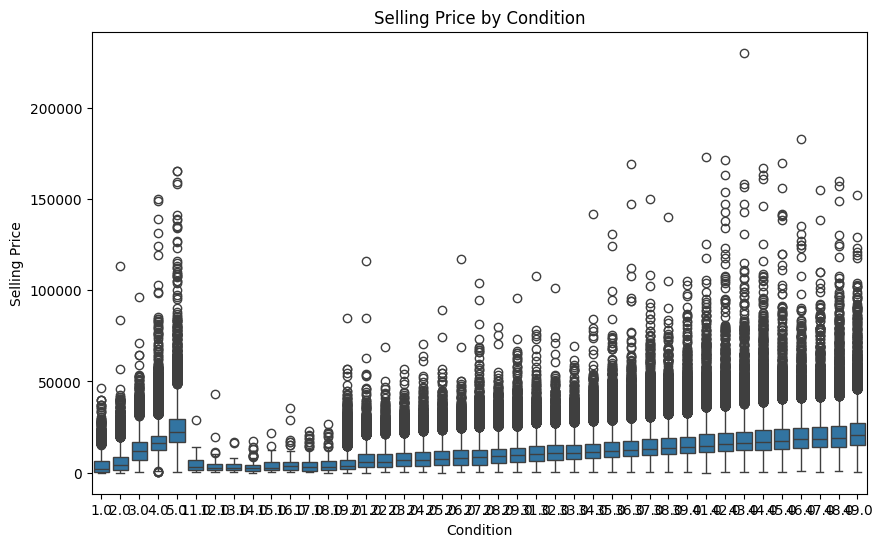

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='condition', y='sellingprice')
plt.title('Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()


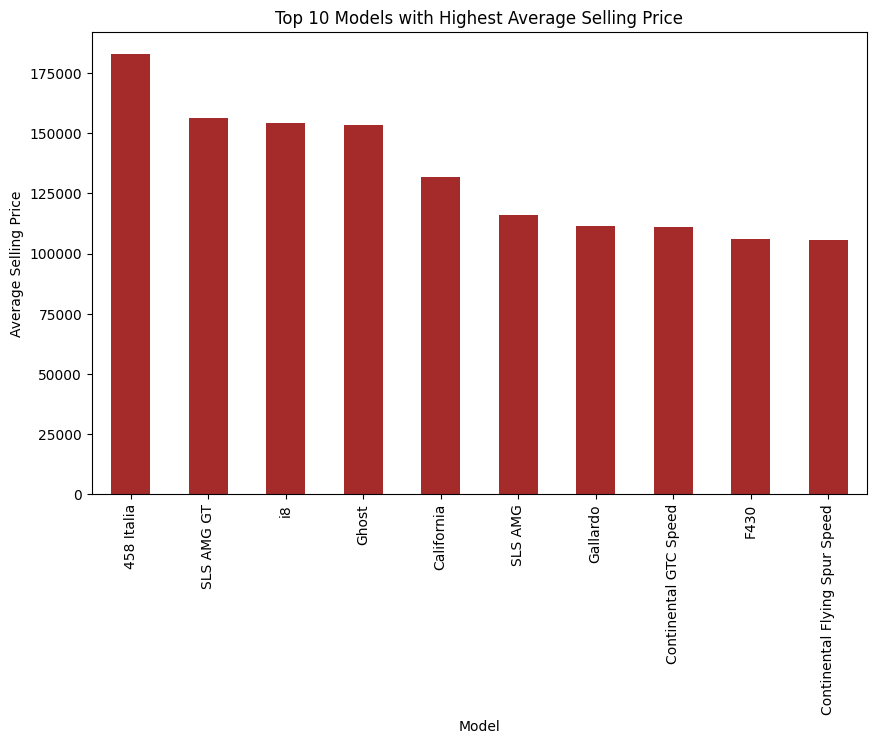

In [17]:
top_models_price = data.groupby('model')['sellingprice'].mean().sort_values(ascending=False).head(10)
top_models_price.plot(kind='bar', figsize=(10, 6), color='brown')
plt.title('Top 10 Models with Highest Average Selling Price')
plt.xlabel('Model')
plt.ylabel('Average Selling Price')
plt.show()


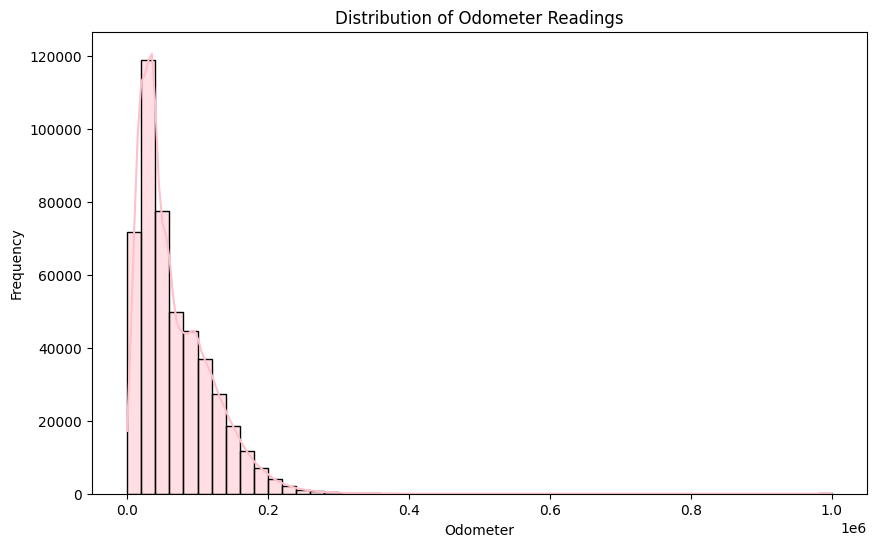

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['odometer'], bins=50, kde=True, color='pink')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.show()


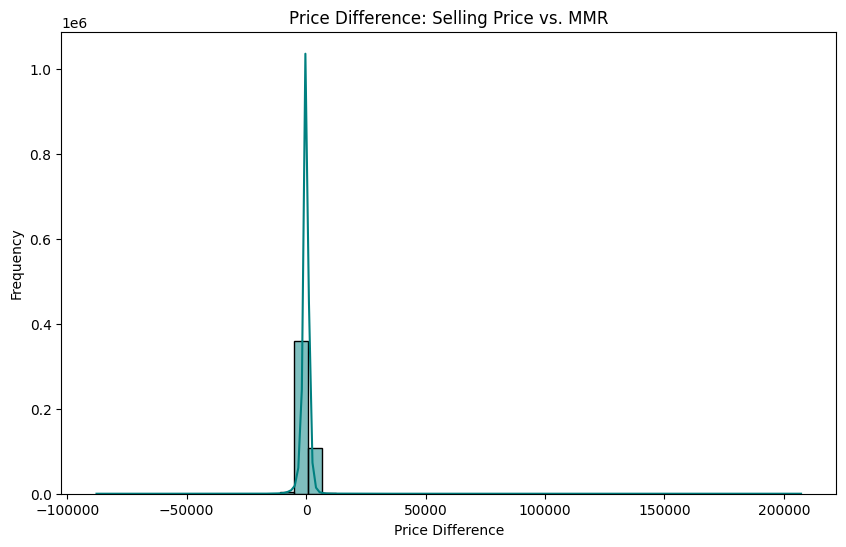

In [19]:
price_diff = data['sellingprice'] - data['mmr']
plt.figure(figsize=(10, 6))
sns.histplot(price_diff, bins=50, kde=True, color='teal')
plt.title('Price Difference: Selling Price vs. MMR')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()


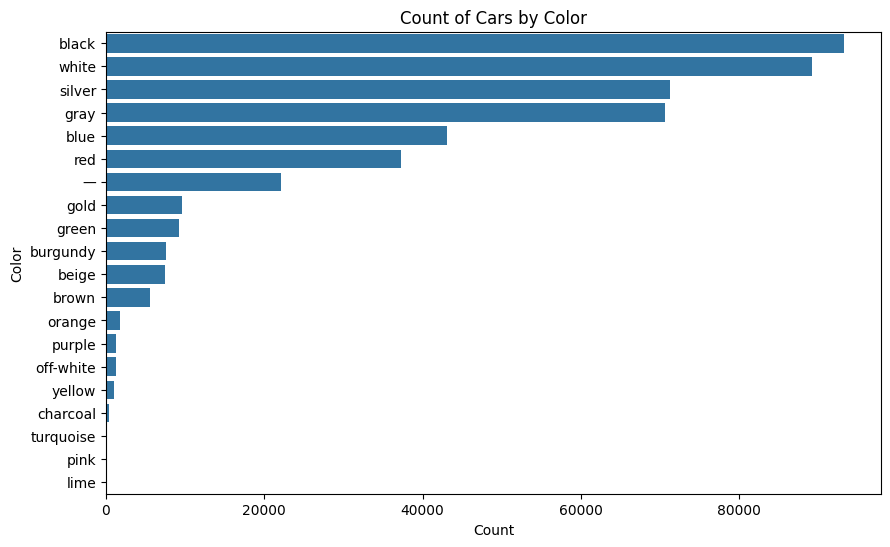

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='color', order=data['color'].value_counts().index)
plt.title('Count of Cars by Color')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()


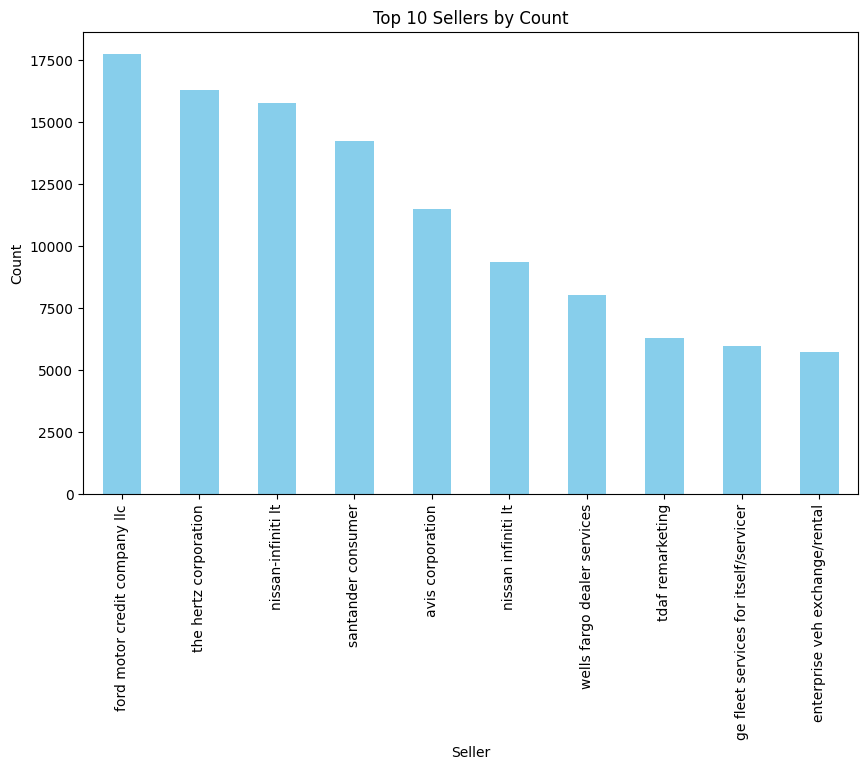

In [21]:
plt.figure(figsize=(10, 6))
top_sellers = data['seller'].value_counts().head(10)
top_sellers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Sellers by Count')
plt.xlabel('Seller')
plt.ylabel('Count')
plt.show()


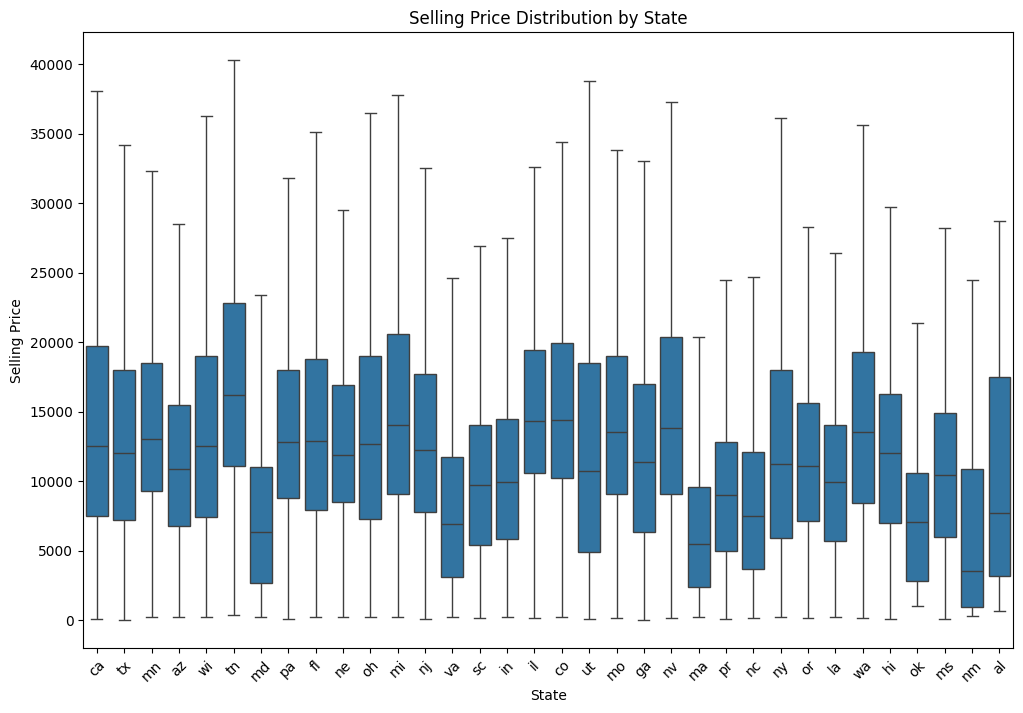

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='state', y='sellingprice', showfliers=False)
plt.title('Selling Price Distribution by State')
plt.xlabel('State')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()
